# FUNDAMENTOS DE ROBÓTICA MÓVIL 

## TP°4: Sistemas en tiempo discreto.

### Profesores:
#### Gonzalo Perez Paina
#### David Gaydou
#### Diego Gonzalez Dondo

### Alumnos:
#### Escobar Daniela   72705
#### Toth Lautaro         72736

## Objetivo

#### Estudiar el comportamiento de lazo cerrado de un sistema multirrotor de un grado de libertad tipo balancı́n utilizando simulación. Se propone crear un modelo en tiempo discreto basado en ecuaciones en diferencias cuya evolución temporal se realizará utilizando funciones de bucle en Python.



## Descripción de la actividad

#### Estudiar la estructura del script y verificar que los resultados que genera cumplen el comportamiento básico del modelo real propuesto. 

## Resolución de actividades:

### 1. Hacer las condiciones iniciales y las acciones de control igual a cero y verificar la estabilidad del punto de equilibrio $q = [0, 0]$ . ¿Existen otros puntos de equilibrio?


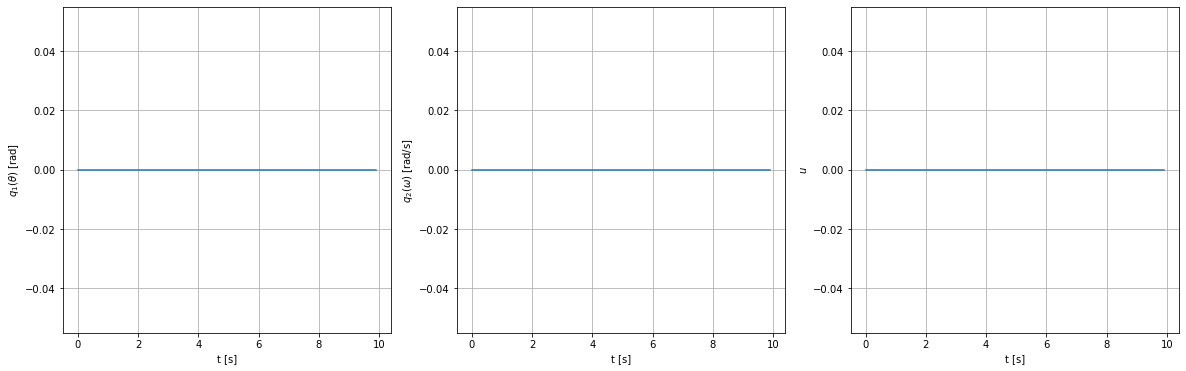

In [130]:
import numpy as np
import matplotlib.pyplot as plt

from plot_q_u import plot_q_u

# Parámetros de simulación.
J = 100e-3      # Momento de inercia
T = 10          # Tiempo de simulación
dt = 0.1        # Intervalo de muestreo
N = int(T/dt)   # Índice máximo de estados discretos

# Vector de tiempos discretos
ts = np.linspace(0, T-dt, N)

# Vector de estado inicial.
# q1 = theta; q2 = theta_punto
q0 = np.array( (0, 0) )

# Vector de estado e inicialización.
q = np.zeros( (2, N) )
q[:, 0] = q0

# Vector de acciones de control.
u = np.zeros( (1, N) )
#u = np.ones( (1, N) )

# Matrices del sistema de estado discretizado.
A = np.array([ [1, dt], [0, 1] ])
B = np.array([ [0], [dt/J] ])

# Bucle para el cálculo de los estados.
for i in range(1, N):
    q[:, i] = A.dot( q[:, i-1] ) + B.dot( u[:, i-1] )


#plot_q_u(q, u, ts)
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1), plt.plot(ts, q[0, :], ), plt.grid(True)
plt.ylabel(r'$q_1 (\theta)$ [rad]'), plt.xlabel('t [s]')
plt.subplot(1, 3, 2), plt.plot(ts, q[1, :]), plt.grid(True)
plt.ylabel(r'$q_2 (\omega)$ [rad/s]'), plt.xlabel('t [s]')
plt.subplot(1, 3, 3), plt.plot(ts, u[0, :]), plt.grid(True)
plt.ylabel('$u$'), plt.xlabel('t [s]')
plt.show()

En la figura de arriba se observa que los valores de θ y ω son nulas para todo tiempo y siempre cuando las acciones de control también lo sean.

Esto es lo que se espera que suceda con el modelo real propuesto, ya que al no haber ninguna condición que rompa el estado de equilibrio, el balancı́n no deberı́a estar en otra posición que no sea la horizontal o en reposo.

Por otro lado, también existen otros puntos de equilibrio y suceden cuando la velocidad inicial y las acciones de control son nulas.

### 2. Analizar la respuesta del sistema frente a:
 
    * diferentes condiciones iniciales.
    * acción de control de tipo escalón unitario.

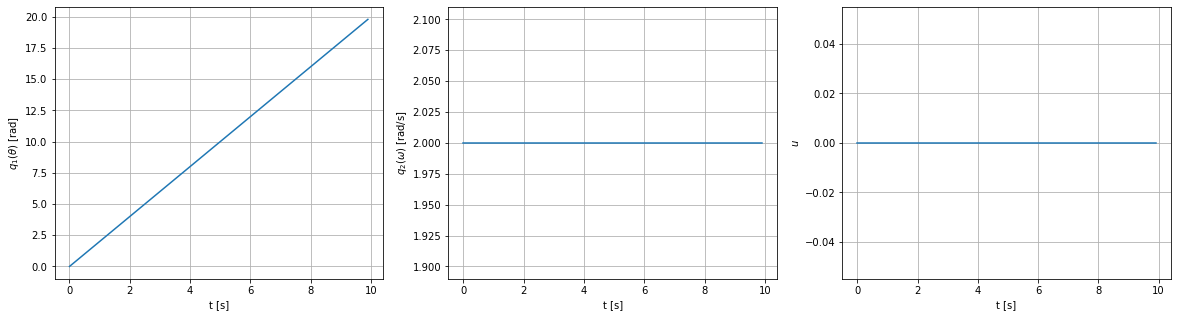

In [124]:
import numpy as np
import matplotlib.pyplot as plt

from plot_q_u import plot_q_u

# Parámetros de simulación.
J = 100e-3      # Momento de inercia
T = 10          # Tiempo de simulación
dt = 0.1        # Intervalo de muestreo
N = int(T/dt)   # Índice máximo de estados discretos

# Vector de tiempos discretos
ts = np.linspace(0, T-dt, N)

# Vector de estado inicial.
# q1 = theta; q2 = theta_punto
q0 = np.array( (0, 2) )

# Vector de estado e inicialización.
q = np.zeros( (2, N) )
q[:, 0] = q0

# Vector de acciones de control.
u = np.zeros( (1, N) )
#u = np.ones( (1, N) )

# Matrices del sistema de estado discretizado.
A = np.array([ [1, dt], [0, 1] ])
B = np.array([ [0], [dt/J] ])

# Bucle para el cálculo de los estados.
for i in range(1, N):
    q[:, i] = A.dot( q[:, i-1] ) + B.dot( u[:, i-1] )


#plot_q_u(q, u, ts)
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1), plt.plot(ts, q[0, :], ), plt.grid(True)
plt.ylabel(r'$q_1 (\theta)$ [rad]'), plt.xlabel('t [s]')
plt.subplot(1, 3, 2), plt.plot(ts, q[1, :]), plt.grid(True)
plt.ylabel(r'$q_2 (\omega)$ [rad/s]'), plt.xlabel('t [s]')
plt.subplot(1, 3, 3), plt.plot(ts, u[0, :]), plt.grid(True)
plt.ylabel('$u$'), plt.xlabel('t [s]')
plt.show()

En la figura anterior la posición inicial es nula y la velocidad es $\omega= 2 rad/s$, lo que genera que la posición ($\theta$) comience a incrementarse de manera lineal.

Esto se debe a que la posición es la integral de la velocidad angular proyectando lo que deberı́amos observar en la práctica.

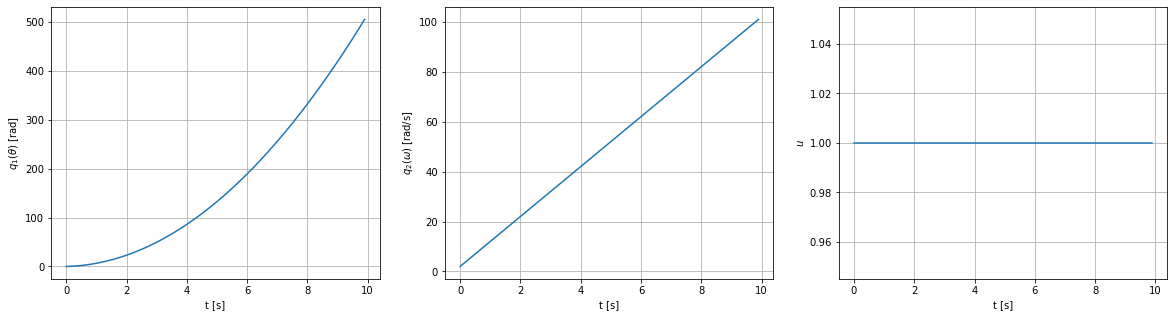

In [126]:
import numpy as np
import matplotlib.pyplot as plt

from plot_q_u import plot_q_u

# Parámetros de simulación.
J = 100e-3      # Momento de inercia
T = 10          # Tiempo de simulación
dt = 0.1        # Intervalo de muestreo
N = int(T/dt)   # Índice máximo de estados discretos

# Vector de tiempos discretos
ts = np.linspace(0, T-dt, N)

# Vector de estado inicial.
# q1 = theta; q2 = theta_punto
q0 = np.array( (0, 2) )

# Vector de estado e inicialización.
q = np.zeros( (2, N) )
q[:, 0] = q0

# Vector de acciones de control.
#u = np.zeros( (1, N) )
u = np.ones( (1, N) )

# Matrices del sistema de estado discretizado.
A = np.array([ [1, dt], [0, 1] ])
B = np.array([ [0], [dt/J] ])

# Bucle para el cálculo de los estados.
for i in range(1, N):
    q[:, i] = A.dot( q[:, i-1] ) + B.dot( u[:, i-1] )


#plot_q_u(q, u, ts)

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1), plt.plot(ts, q[0, :], ), plt.grid(True)
plt.ylabel(r'$q_1 (\theta)$ [rad]'), plt.xlabel('t [s]')
plt.subplot(1, 3, 2), plt.plot(ts, q[1, :]), plt.grid(True)
plt.ylabel(r'$q_2 (\omega)$ [rad/s]'), plt.xlabel('t [s]')
plt.subplot(1, 3, 3), plt.plot(ts, u[0, :]), plt.grid(True)
plt.ylabel('$u$'), plt.xlabel('t [s]')
plt.show()

En el gráfico que se muestra arriba se propusieron que la posición inicial sea nula y la velocidad angular $\omega= 2 rad/s$ pero con una acción de control igual a la unidad, produciendo que la velocidad angular ($\omega$) tenga un incremento lineal, mientras que la posición ($\theta$) empieza a variar de manera exponencial.

Del mismo modo que sucedió con la posición en la primer situación, la integral es la que da estas formas, primero se puede ver la variacion lineal por la integral del torque y luego de la exponencial por la integral de velocidad.

### Realizar las modificaciones necesarias en el script para obtener un modelo de lazo cerrado que tome una muestra de la posición angular de salida y la compare con la señal de referencia para generar un error que se usará como acción de control multiplicada por un factor constante $K _P$ .

### 3. Simular para $K_P=0,1$ ,  $K_P=1$ y $K_P=10$. Contrastar el resultado con los valores obtenidos con el paquete de control en el trabajo anterior.

Para obtener un modelo de lazo cerrado se modificó el script, se toma una muestra de la posición angular de salida y se compara con una señal de referencia, generando una variable error que se usa como una nueva acción de control y luego se multiplica por un factor constante $K_P$.

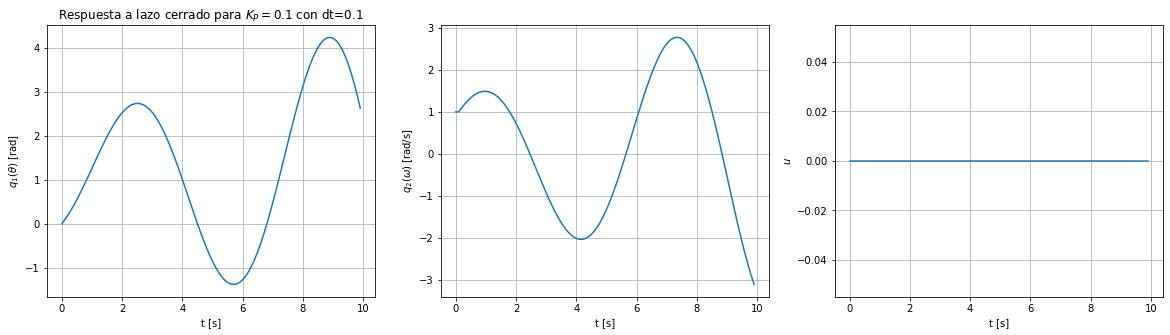

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from plot_q_u import plot_q_u

# Parámetros de simulación.
J = 100e-3      # Momento de inercia
T = 10          # Tiempo de simulación
dt = 0.1      # Intervalo de muestreo
N = int(T/dt)   # Índice máximo de estados discretos
K=0.1
V_ref=1
# Vector de tiempos discretos
ts = np.linspace(0,T-dt,N)


# Vector de estado inicial.
# q1 = theta; q2 = theta_punto
q0 = np.array( (0, 1) )

# Vector de estado e inicialización.
q = np.zeros( (2, N) )

q[:, 0] = q0

# Vector de acciones de control.
u = np.zeros( (1, N) )

uaux=np.zeros((1,N))#error

v = np.zeros( (1, N) )

# Matrices del sistema de estado discretizado.
A = np.array([ [1, dt], [0, 1] ])
B = np.array([ [0], [dt/J] ])

# Bucle para el cálculo de los estados.
for i in range(1, N):
    uaux[:,i]=K*(V_ref-q[0,i-1])

    q[:, i] = A.dot( q[:, i-1] ) + B.dot(uaux[:,i-1])
  

#plot_q_u(q, u, ts)

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1), plt.plot(ts, q[0, :],), plt.grid(True)
plt.ylabel(r'$q_1 (\theta)$ [rad]'), plt.xlabel('t [s]')
plt.title('Respuesta a lazo cerrado para $K_P=0.1$ con dt=0.1')
plt.subplot(1, 3, 2), plt.plot(ts, q[1, :]), plt.grid(True)
plt.ylabel(r'$q_2 (\omega)$ [rad/s]'), plt.xlabel('t [s]')
plt.subplot(1, 3, 3), plt.plot(ts, v[0, :]), plt.grid(True)
plt.ylabel('$u$'), plt.xlabel('t [s]')

plt.show()

 En la figura se observa que la respuesta del sistema presenta una inestabilidad y ocurre por el intervalo de muestreo. 

 Esto se debe a que el intervalo es demasiado grande y la cantidad de muestras no son las suficientes para obtener una buena respuesta del sistema. Por esto, mientras más chico sea este valor, mayor resolución del sistema tendremos. 

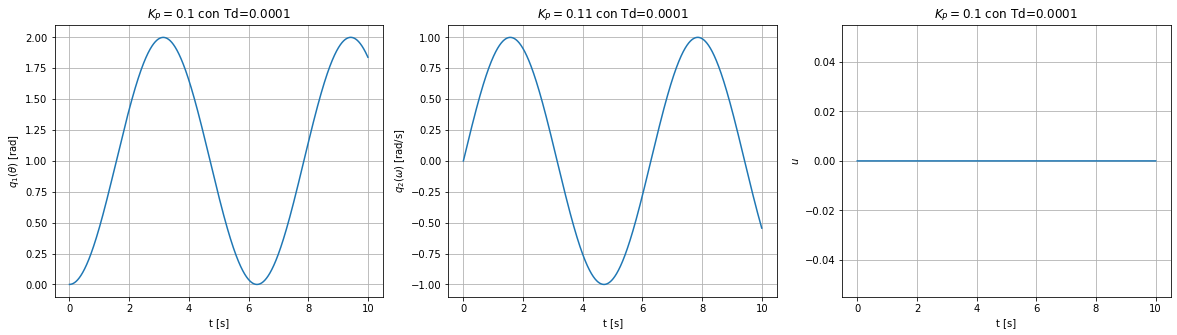

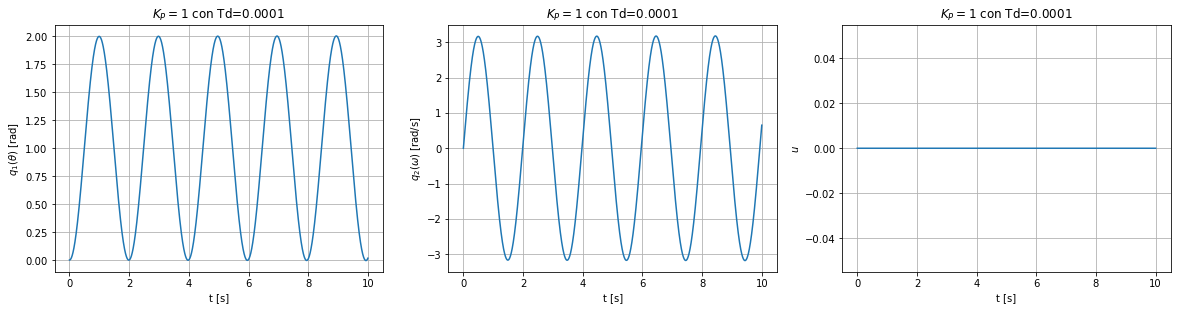

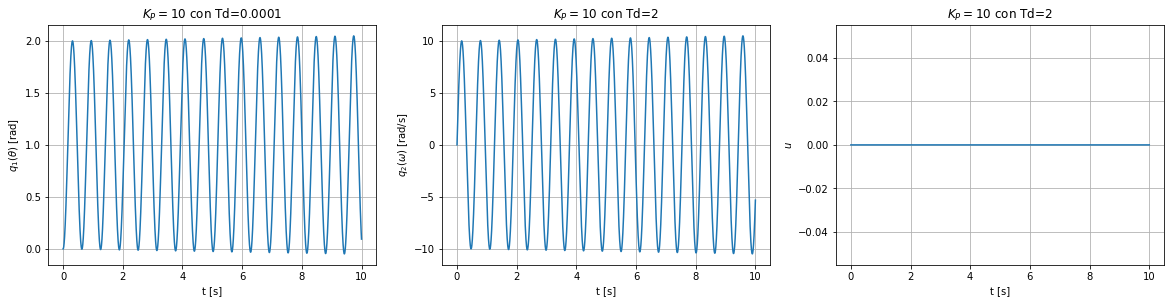

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from plot_q_u import plot_q_u

# Parámetros de simulación.
J = 100e-3      # Momento de inercia
T = 10          # Tiempo de simulación
dt = 0.0001      # Intervalo de muestreo
N = int(T/dt)   # Índice máximo de estados discretos
K=0.1
K1=1
K2=10
V_ref=1
# Vector de tiempos discretos
ts = np.linspace(0,T-dt,N)


# Vector de estado inicial.
# q1 = theta; q2 = theta_punto
q0 = np.array( (0, 0) )

# Vector de estado e inicialización.
q = np.zeros( (2, N) )
q[:, 0] = q0
    #---------------
q1 = np.zeros( (2, N) )
q1[:, 0] = q0
    #---------------
q2 = np.zeros( (2, N) )
q2[:, 0] = q0
    
# Vector de acciones de control.
u = np.zeros( (1, N) )

uaux=np.zeros((1,N))#error

v = np.zeros( (1, N) )
# Matrices del sistema de estado discretizado.
A = np.array([ [1, dt], [0, 1] ])
B = np.array([ [0], [dt/J] ])

# Bucle para el cálculo de los estados.
for i in range(1, N):
    uaux[0,i-1]=K*(V_ref-q[0,i-1])
    q[:, i] = A.dot( q[:, i-1] ) + B.dot(uaux[:,i-1])

for i in range(1, N):
    uaux[0,i-1]=K1*(V_ref-q1[0,i-1])
    q1[:, i] = A.dot( q1[:, i-1] ) + B.dot(uaux[:,i-1])
  
for i in range(1, N):
    uaux[0,i-1]=K2*(V_ref-q2[0,i-1])
    q2[:, i] = A.dot( q2[:, i-1] ) + B.dot(uaux[:,i-1])
  
plt.figure(figsize=(20, 5))
#plt.subplot(131)
plt.subplot(1, 3, 1), plt.plot(ts, q[0, :],), plt.grid(True)
plt.ylabel(r'$q_1 (\theta)$ [rad]'),plt.xlabel('t [s]')
plt.title('$K_P=0.1$ con Td=0.0001')

plt.subplot(1, 3, 2), plt.plot(ts, q[1, :]), plt.grid(True)
plt.title('$K_P=0.11$ con Td=0.0001'),plt.xlabel('t [s]'),
plt.ylabel(r'$q_2 (\omega)$ [rad/s]')

plt.subplot(1, 3, 3), plt.plot(ts, v[0, :]), plt.grid(True)
plt.title('$K_P=0.1$ con Td=0.0001'),plt.xlabel('t [s]'),
plt.ylabel('$u$')


plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1), plt.plot(ts, q1[0, :],), plt.grid(True)
plt.ylabel(r'$q_1 (\theta)$ [rad]'),plt.xlabel('t [s]')
plt.title('$K_P=1$ con Td=0.0001')

plt.subplot(2, 3, 2), plt.plot(ts, q1[1, :]), plt.grid(True)
plt.title('$K_P=1$ con Td=0.0001'),plt.xlabel('t [s]'),
plt.ylabel(r'$q_2 (\omega)$ [rad/s]')

plt.subplot(2, 3, 3), plt.plot(ts, v[0, :]), plt.grid(True)
plt.title('$K_P=1$ con Td=0.0001'),plt.xlabel('t [s]'),
plt.ylabel('$u$')

plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1), plt.plot(ts, q2[0, :],), plt.grid(True)
plt.ylabel(r'$q_1 (\theta)$ [rad]'),plt.xlabel('t [s]')
plt.title('$K_P=10$ con Td=0.0001')

plt.subplot(3, 3, 2), plt.plot(ts, q2[1, :]), plt.grid(True)
plt.title('$K_P=10$ con Td=2'),plt.xlabel('t [s]'),
plt.ylabel(r'$q_2 (\omega)$ [rad/s]')

plt.subplot(3, 3, 3), plt.plot(ts, v[0, :]), plt.grid(True)
plt.title('$K_P=10$ con Td=2'),plt.xlabel('t [s]'),
plt.ylabel('$u$')


plt.show()

#plt.figure(figsize=(18, 16))
#plt.subplot(3, 1, 1), plt.plot(ts, q[0, :],), plt.grid(True)
#plt.ylabel(r'$q_1 (\theta)$ [rad]'),
#plt.title('Respuesta a lazo cerrado para $K_P=0.1$ con dt=0.0001')
#plt.subplot(3, 1, 2), plt.plot(ts, q[1, :]), plt.grid(True)
#plt.ylabel(r'$q_2 (\omega)$ [rad/s]'),
#plt.subplot(3, 1, 3), plt.plot(ts, v[0, :]), plt.grid(True)
#plt.ylabel('$u$'), plt.xlabel('t [s]')

#plt.show()

Para un valor de $dt = 1x10^{−4}$ esta inestabilidad se reduce visiblemente.

Al incrementar la constante $K_P$ , aumenta la frecuencia de oscilación del sistema.

### Introducir la modificaciones necesarias en el script para que utilizando cociente de diferencias se obtenga la derivada de la señal de posición angular $θ_o(t)$. Utilizar esta señal para implementar un compensador derivativo.

### 4. Obtener las gráficas para valores de $K=0,1$ ,  $K=1$ , $K=10$ usando para cada caso los valores de $T_d=0,1$ , $T_d=T_{dcrit}$ y $T_d=2$.

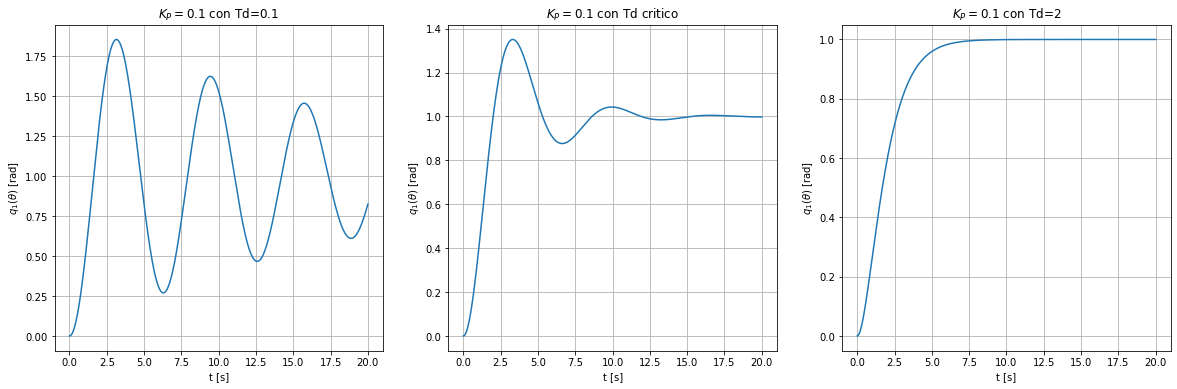

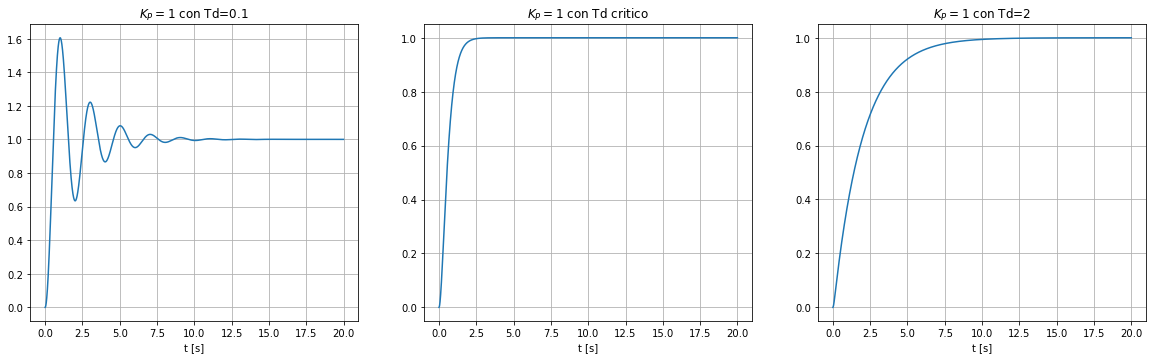

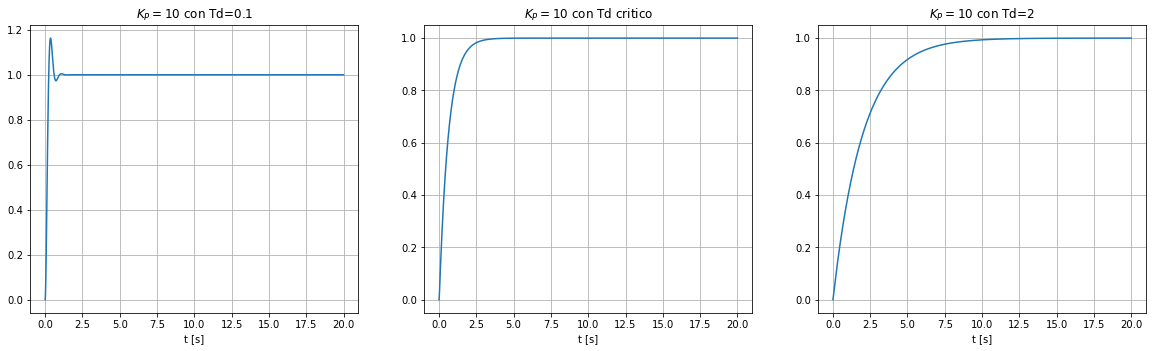

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import math
from pylab import *
from plot_q_u import plot_q_u

# Parámetros de simulación.
J = 100e-3      # Momento de inercia
T = 20          # Tiempo de simulación
dt = 0.0001        # Intervalo de muestreo
N = int(T/dt)   # Índice máximo de estados discretos
K=0.1
K1=1
K2=10
Td=0.1
Td1=math.sqrt(2/5)
Td2=2
# Vector de tiempos discretos
ts = np.linspace(0, T-dt,N)

# Vector de estado inicial.
# q1 = theta; q2 = theta_punto
q0 = np.array( (0, 0) )

# Vector de estado e inicialización.
q = np.zeros( (2, N) )
q[:, 1] = q0

# Vector de acciones de control.
u = np.zeros((1,N))

# Matrices del sistema de estado discretizado.
A = np.array([ [1, dt], [0, 1] ])
B = np.array([ [0], [dt/J] ])

# derivada del error-->uaux´= (uaux{k+1}-uaux{k})/dt
v=np.zeros((1,N))
uaux=np.zeros((1,2)) #error

# Bucle para el cálculo de los estados.
for i in range(1, N):
    q[:, i] = A.dot( q[:, i-1] ) + B.dot(u[:,i-1])
    uaux[0,0]=(V_ref-q[0,i])#error
    uaux[0,1]=(uaux[0,0]-(V_ref-q[0,i-1]))/dt#derivada del error
    u[:,i]=((uaux[0,0]) + (uaux[0,1])*Td)*K
     
#-----------------------------K1=1---------------------------------------

q1 = np.zeros( (2, N) )
q1[:, 1] = q0

u1 = np.zeros((1,N))

v=np.zeros((1,N))
uaux1=np.zeros((1,2)) #error

for i in range(1, N):
   
    q1[:, i] = A.dot( q1[:, i-1] ) + B.dot(u1[:,i-1])
    uaux1[0,0]=(V_ref-q1[0,i])#error
    uaux1[0,1]=(uaux1[0,0]-(V_ref-q1[0,i-1]))/dt#derivada del error
    u1[:,i]=((uaux1[0,0]) + (uaux1[0,1])*Td)*K1
     
#-------------------------------------------------------------------
    
#-----------------------------K2=10---------------------------------------

q2 = np.zeros( (2, N) )
q2[:, 1] = q0

u2 = np.zeros((1,N))

v=np.ones((1,N))
uaux2=np.zeros((1,2)) #error

for i in range(1, N):
   
    q2[:, i] = A.dot( q2[:, i-1] ) + B.dot(u2[:,i-1])
    uaux2[0,0]=(V_ref-q2[0,i])#error
    uaux2[0,1]=(uaux2[0,0]-(V_ref-q2[0,i-1]))/dt#derivada del error
    u2[:,i]=((uaux2[0,0]) + (uaux2[0,1])*Td)*K2
   
#-------------------------------------------------------------------
    
#-----------------------------K=0.1--Td1=crit---------------------------------------

q3 = np.zeros( (2, N) )
q3[:, 1] = q0

u3 = np.zeros((1,N))
# derivada del error
v=np.ones((1,N))
uaux3=np.zeros((1,2)) #error

for i in range(1, N):
   
    q3[:, i] = A.dot( q3[:, i-1] ) + B.dot(u3[:,i-1])
    uaux3[0,0]=(V_ref-q3[0,i])#error
    uaux3[0,1]=(uaux3[0,0]-(V_ref-q3[0,i-1]))/dt#derivada del error
    u3[:,i]=((uaux3[0,0]) + (uaux3[0,1])*Td1)*K
    
#-------------------------------------------------------------------
   
 #-----------------------------K=1--Td1=crit---------------------------------------

q4 = np.zeros( (2, N) )
q4[:, 1] = q0

u4 = np.zeros((1,N))
# derivada del error
v=np.ones((1,N))
uaux4=np.zeros((1,2)) #error

for i in range(1, N):
   
    q4[:, i] = A.dot( q4[:, i-1] ) + B.dot(u4[:,i-1])
    uaux4[0,0]=(V_ref-q4[0,i])#error
    uaux4[0,1]=(uaux4[0,0]-(V_ref-q4[0,i-1]))/dt#derivada del error
    u4[:,i]=((uaux4[0,0]) + (uaux4[0,1])*Td1)*K1
   
#-------------------------------------------------------------------
 
#-----------------------------K2=10--Td1=crit-------------------------------------

q5 = np.zeros( (2, N) )
q5[:, 1] = q0

u5 = np.zeros((1,N))
# derivada del error
v=np.ones((1,N))
uaux5=np.zeros((1,2)) #error

for i in range(1, N):
   
    q5[:, i] = A.dot( q5[:, i-1] ) + B.dot(u5[:,i-1])
    uaux5[0,0]=(V_ref-q5[0,i])#error
    uaux5[0,1]=(uaux5[0,0]-(V_ref-q5[0,i-1]))/dt#derivada del error
    u5[:,i]=((uaux5[0,0]) + (uaux5[0,1])*Td1)*K2
   
#-------------------------------------------------------------------
#-----------------------------K=0.1--Td=2-------------------------------------

q6 = np.zeros( (2, N) )
q6[:, 1] = q0

u6 = np.zeros((1,N))
# derivada del error
v=np.ones((1,N))
uaux6=np.zeros((1,2)) #error

for i in range(1, N):
   
    q6[:, i] = A.dot( q6[:, i-1] ) + B.dot(u6[:,i-1])
    uaux6[0,0]=(V_ref-q6[0,i])#error
    uaux6[0,1]=(uaux6[0,0]-(V_ref-q6[0,i-1]))/dt#derivada del error
    u6[:,i]=((uaux6[0,0]) + (uaux6[0,1])*Td2)*K
   
#-------------------------------------------------------------------
  
#-----------------------------K1=1--Td=2-------------------------------------

q7 = np.zeros( (2, N) )
q7[:, 1] = q0

u7 = np.zeros((1,N))
# derivada del error
v=np.ones((1,N))
uaux7=np.zeros((1,2)) #error

for i in range(1, N):
   
    q7[:, i] = A.dot( q7[:, i-1] ) + B.dot(u7[:,i-1])
    uaux7[0,0]=(V_ref-q7[0,i])#error
    uaux7[0,1]=(uaux7[0,0]-(V_ref-q7[0,i-1]))/dt#derivada del error
    u7[:,i]=((uaux7[0,0]) + (uaux7[0,1])*Td2)*K1
   
#-------------------------------------------------------------------
    
#-----------------------------K2=10--Td=2-------------------------------------

q8 = np.zeros( (2, N) )
q8[:, 1] = q0

u8 = np.zeros((1,N))
# derivada del error
v=np.ones((1,N))
uaux8=np.zeros((1,2)) #error

for i in range(1, N):
   
    q8[:, i] = A.dot( q8[:, i-1] ) + B.dot(u8[:,i-1])
    uaux8[0,0]=(V_ref-q8[0,i])#error
    uaux8[0,1]=(uaux8[0,0]-(V_ref-q8[0,i-1]))/dt#derivada del error
    u8[:,i]=((uaux8[0,0]) + (uaux8[0,1])*Td2)*K2
   
#-------------------------------------------------------------------
plt.figure(figsize=(20, 6))
#plt.subplot(131)
plt.subplot(1, 3, 1), plt.plot(ts, q[0, :],), plt.grid(True)
plt.ylabel(r'$q_1 (\theta)$ [rad]'),plt.xlabel('t [s]')
plt.title('$K_P=0.1$ con Td=0.1')

plt.subplot(1, 3, 2), plt.plot(ts, q3[0, :],), plt.grid(True)
plt.ylabel(r'$q_1 (\theta)$ [rad]'),plt.xlabel('t [s]')
plt.title('$K_P=0.1$ con Td critico')


plt.subplot(1, 3, 3),  plt.plot(ts, q6[0, :],), plt.grid(True)
plt.ylabel(r'$q_1 (\theta)$ [rad]'),plt.xlabel('t [s]')
plt.title('$K_P=0.1$ con Td=2')

plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1), plt.plot(ts, q1[0, :]), plt.grid(True)
plt.title('$K_P=1$ con Td=0.1'),plt.xlabel('t [s]')


plt.subplot(2, 3, 2), plt.plot(ts, q4[0, :]), plt.grid(True)
plt.title('$K_P=1$ con Td critico'),plt.xlabel('t [s]')

plt.subplot(2, 3, 3), plt.plot(ts, q7[0, :]), plt.grid(True)
plt.title('$K_P=1$ con Td=2'),plt.xlabel('t [s]')


plt.figure(figsize=(20, 18))
plt.subplot(3, 3, 1), plt.plot(ts, q2[0, :]), plt.grid(True)
plt.title('$K_P=10$ con Td=0.1'),plt.xlabel('t [s]')


plt.subplot(3, 3, 2), plt.plot(ts, q5[0, :]), plt.grid(True)
plt.title('$K_P=10$ con Td critico'),plt.xlabel('t [s]')
 

plt.subplot(3, 3, 3), plt.plot(ts, q8[0, :]), plt.grid(True)
plt.title('$K_P=10$ con Td=2'),plt.xlabel('t [s]')


plt.show()



Se modificó nuevamente el script para poder obtener la derivada del error y con esta poder implementar un compensador derivativo.
$$\dot{error}_k =\frac{error_{k+1} − error_k}{dt}$$

Se graficó la respuesta para todos los tiempos derivativos y para todas las constantes de ganancia, lo cual se muestra en la figura anterior.

El compensador derivativo convierte el sistema inestable a un sistema estable añadiendo atenuación para evitar la oscilación.

### Agregar ruido de medición en la posición angular introduciendo la siguiente lı́nea al final del bucle de actualización de los estados.
$$q[0, i+1] = q[0, i+1] + fn*(np.random.rand() - 0.5) * q[0, i+1]$$

### Ajustar el parámetro de amplitud del ruido fn a $0,02 (2 \%)$ y $0, 05 (5 \%)$.

### 5. Correr la simulación y obtener las gráficas correspondientes cuando $K_P=1$ y $T_d=T_{dcrit}$ .

Text(0.5, 1.0, '$K_P=1$ con Td crítico y $f_n=0.05$')

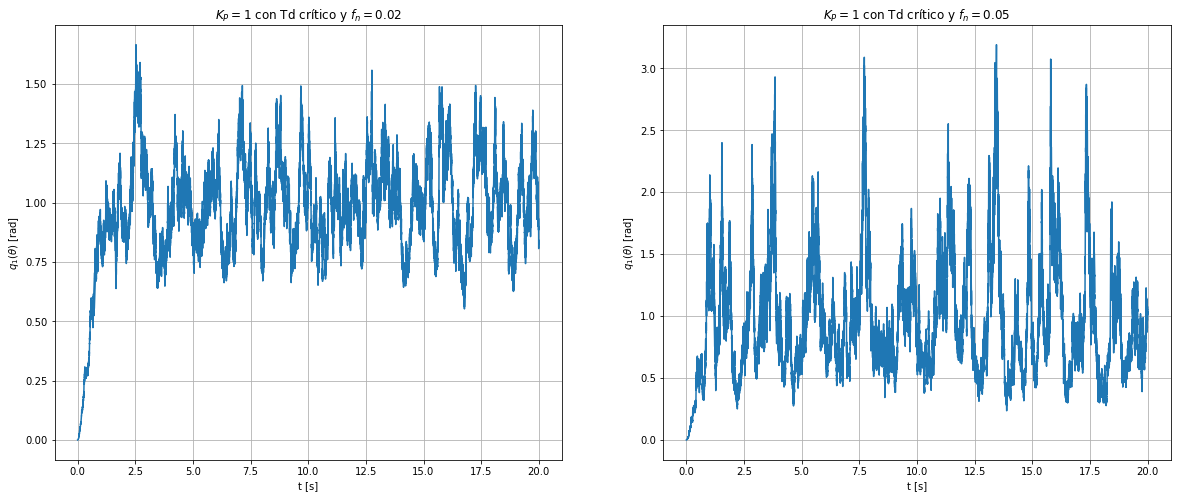

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import math
from plot_q_u import plot_q_u

# Parámetros de simulación.
J = 100e-3      # Momento de inercia
T = 20          # Tiempo de simulación
dt = 0.0001        # Intervalo de muestreo
N = int(T/dt)   # Índice máximo de estados discretos
K=1
fn=0.02
fn1=0.05
Td=math.sqrt(2/5)
V_ref=1
# Vector de tiempos discretos
ts = np.linspace(0, T-dt,N)

# Vector de estado inicial.
# q1 = theta; q2 = theta_punto
q0 = np.array( (0, 0) )

# Vector de estado e inicialización.
q = np.zeros( (2, N) )
q[:, 0] = q0
qk=q 

# Vector de acciones de control.
u = np.zeros( (1, N) )
uaux=np.zeros((1,2))

# Matrices del sistema de estado discretizado.
A = np.array([ [1, dt], [0, 1] ])
B = np.array([ [0], [dt/J] ])

# Bucle para el cálculo de los estados.
for i in range(1, N):
    q[:, i] = A.dot( q[:, i-1] ) + B.dot(u[:,i-1])
    q[0,i]=q[0,i]+fn*(np.random.rand() -0.5)*(q[0,i])
    uaux[0,0]=(V_ref-q[0,i])
    uaux[0,1]=(uaux[0,0]-(V_ref-q[0,i-1]))/dt
    u[:,i]=(uaux[0,0]+Td*uaux[0,1])*K

#-------------------------------------------------------------------
    

q1 = np.zeros( (2, N) )
q1[:, 1] = q0

u1 = np.zeros((1,N))

uaux1=np.zeros((1,2)) #error

# Bucle para el cálculo de los estados.
for i in range(1, N):
    q1[:, i] = A.dot( q1[:, i-1] ) + B.dot(u1[:,i-1])
    q1[0,i]=q1[0,i]+fn1*(np.random.rand() -0.5)*(q1[0,i])
    uaux1[0,0]=(V_ref-q1[0,i])
    uaux1[0,1]=(uaux1[0,0]-(V_ref-q1[0,i-1]))/dt
    u1[:,i]=(uaux1[0,0]+Td*uaux1[0,1])*K


plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1), plt.plot(ts, q[0, :],), plt.grid(True)
plt.ylabel(r'$q_1 (\theta)$ [rad]'),plt.xlabel('t [s]')
plt.title('$K_P=1$ con Td crítico y $f_n=0.02$')

plt.subplot(1, 2, 2), plt.plot(ts, q1[0, :],), plt.grid(True)
plt.ylabel(r'$q_1 (\theta)$ [rad]'),plt.xlabel('t [s]')
plt.title('$K_P=1$ con Td crítico y $f_n=0.05$')


Al agregar ruido a la señal, vemos como se distorsiona y se dificulta la lectura para la obtención de datos.

Lo que se distingue, es la tendencia que tiene la señal de acercarse a la posición de $\theta = 1$.

### Conclusión

Lo que se debió tener en cuenta para obtener la respuesta a lazo cerrado del sistema, fue el intervalo de muestreo (dt) que con el valor dado no tomaba la cantidad de muestras necesarias para una correcta simulación del sistema.

Además podemos ver la dependencia de la señal con la ganancia y el $T_d$.